In [119]:
from urllib.request import urlopen
import requests 
from bs4 import BeautifulSoup as BS
import re
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns


In [120]:
req_headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'authority': 'www.redfin.com',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'cookie': 'RF_BROWSER_ID=L60AjcauTBebcYlIR2U4kw; RF_BID_UPDATED=1; G_ENABLED_IDPS=google; RF_VISITED=true; searchMode=1; sortOrder=1; sortOption=special_blend; collapsedMapView=1; unifiedLastSearch=name%3DSan%2520Jose%26subName%3DSan%2520Jose%252C%2520CA%252C%2520USA%26url%3D%252Fcity%252F17420%252FCA%252FSan-Jose%26id%3D2_17420%26type%3D2%26unifiedSearchType%3D2%26isSavedSearch%3D%26countryCode%3DUS; RF_MARKET=sanfrancisco; RF_BUSINESS_MARKET=2; userPreferences=parcels%3Dtrue%26schools%3Dfalse%26mapStyle%3Ds%26statistics%3Dtrue%26agcTooltip%3Dfalse%26agentReset%3Dfalse%26ldpRegister%3Dfalse%26afCard%3D2%26schoolType%3D0%26lastSeenLdp%3DnoSharedSearchCookie%26viewedSwipeableHomeCardsDate%3D1663615482894; RF_HOT_MARKET=%7B%22lastPromptedDate%22%3A1663622678439%2C%22expiration%22%3A1664160906220%2C%22promptedTimes%22%3A2%7D; RF_UNBLOCK_ID=AkKegX94; RF_CORVAIR_LAST_VERSION=437.1.0; RF_LAST_NAV=1; g_state={"i_p":1664477071453,"i_l":3}; FEED_TIMESTAMP=1663872301375; RF_LAST_SEARCHED_CITY=San%20Jose; RF_LISTING_VIEWS=157190844.156904928.156448970.157168473.157119319.153865147.156376334.157161427.157135189.157099478.156597405.156758795.157151930; RF_LAST_DP_SERVICE_REGION=482; RF_LDP_VIEWS_FOR_PROMPT=%7B%22viewsData%22%3A%7B%2209-18-2022%22%3A%7B%22156376334%22%3A2%2C%22156597405%22%3A1%2C%22156758795%22%3A1%2C%22157099478%22%3A1%2C%22157135189%22%3A1%2C%22157151930%22%3A1%2C%22157161427%22%3A3%7D%2C%2209-19-2022%22%3A%7B%22153865147%22%3A1%2C%22157119319%22%3A2%2C%22157168473%22%3A1%7D%2C%2209-20-2022%22%3A%7B%22156448970%22%3A1%2C%22156904928%22%3A1%7D%2C%2209-22-2022%22%3A%7B%22157190844%22%3A2%7D%7D%2C%22expiration%22%3A%222024-09-17T20%3A50%3A26.681Z%22%2C%22totalPromptedLdps%22%3A0%7D; AKA_A2=A; ak_bmsc=9FF122CA17FE1E89A4458C649939DF87~000000000000000000000000000000~YAAQnfEPFxH1VD+DAQAAoVfmZxHPjQWmo2t3O/XTqvZ/1SVHhr+yFLW5o0kAXot+yWYoruCrNpO3ccw5Bx/zungOUzZKcpBy1KVuHH+X484s3BoEKaMoE1BDQycWtMLopRe9kHeTaDkbosq6n2f08nxVacsMWMb+km4w8n0rWNpp5WYqxpJ4vwkgE+uAGoK2TcrprnZqO78lvCJHf97qwokJsjnMnQ59AsrzYktY7KcMvfaM2g3jh9uXhOKM5qlJeqqd+djVlMbQXzUnXt0RQ0AsIbrKpm3nPgT8Cvv4Yd0NGt7RM4M2tanq5vUjJIyvLX6XYURZGxl+QKV59gOi3mLen6e7T+LT58mkciEPt/jdXMn8c9qrDltYRZsQs99CudJdOzsfUWsiQaE=; audS=t; FEED_COUNT=%5B%229%22%2C%22f%22%5D; RF_BROWSER_CAPABILITIES=%7B%22screen-size%22%3A3%2C%22events-touch%22%3Afalse%2C%22ios-app-store%22%3Afalse%2C%22google-play-store%22%3Afalse%2C%22ios-web-view%22%3Afalse%2C%22android-web-view%22%3Afalse%7D; bm_mi=4159B310D72863C613F00E892833EFE6~YAAQnfEPF533VD+DAQAAsX3mZxFRqu7J+Yy1t52a26eVRiEDcZ1/wHmcZEsRYuhhMhPzyZBcTtSqQ+kf4ul+LqLPAVqrMD5SrZDjpwpgFb/sMJKATQqf7eE2co+Iqlt8tAZmrvLxVRttLgjMY69wkhZh3TJQBAIp5ps6k4aN7XvPWcm2VdnEA73z0Qh4DIINJ7N50EwvX0kPDWujY3EziiW313Z/P7aeXgjQfMeX5RN+lvPOnb+57eiNUPFuDpofVMAmk3Y7UO0iF762Nq2mvY1CleGGBPqmAi5XcPxO6fD3vPk6Zw2wLT/ii9nR3g==~1; bm_sv=D3347A4C765D52735869E81D6328C1D9~YAAQnfEPF573VD+DAQAAsX3mZxE41YEsMfn7RBl/6FsepnyqN8/sn0Fg9ZwhL+Ii8SxmSJvDzuHByr/PtoyiEdHTjhT3rhXN85jdDoyu7w12HoC2jUF25Sqm3JYGk7eoCs4XP0ibWuXPgf0XCzV8XYYjh3re9aITggLT3PjWu0spjSJH+MeykR3Z+2/B/THfZF6iistglIH0pgVSaQKogvcEeYphrRM6hncmdDEDBX26V5+DjewBumdroAtAACl8~1',
    'referer': 'https://www.redfin.com/',
    'sec-ch-ua': '"Google Chrome";v="105", "Not)A;Brand";v="8", "Chromium";v="105"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin'
}

In [121]:
url = "https://www.redfin.com/state/Missouri"
r = requests.Session().get(url, headers=req_headers)
soup = BS(r.content, 'html.parser')

In [122]:
all_urls = [a['href'] for a in soup('a')  if a.has_attr('href')]
all_urls

['/',
 '/houses-near-me',
 '/rentals',
 '/myredfin/agent',
 '/feed',
 '/myredfin/favorites',
 '/premier',
 '/sell-a-home/address?inquirySource=285',
 '/rentals/list-my-home-for-rent',
 'https://redfin.onelink.me/iy7h/jj3daydf',
 '/',
 '/myredfin/saved-searches',
 '/why-sell',
 '/myredfin/owner-dashboard',
 '/myredfin/openhouses',
 '/myredfin/tours',
 '/mortgage-menu',
 '/careers/real-estate',
 '/myredfin/notification-settings',
 'tel:1-844-759-7732',
 'tel:1-844-759-7732',
 '/houses-near-me',
 '/houses-near-me',
 '/condos-near-me',
 '/land-near-me',
 '/open-houses-near-me',
 '/why-buy',
 '/premier',
 '/how-much-house-can-i-afford',
 '/guides/buy',
 '/buy-a-home/openbook',
 '/buy-a-home/classes-and-events',
 '/us-housing-market',
 '/rentals',
 '/rentals/list-my-home-for-rent',
 '/city/17420/CA/San-Jose/rental-market',
 '/news/rental-tracker/',
 '/how-much-rent-can-i-afford',
 '/guides/renting-vs-buying-a-house',
 '/guides/first-time-renters-guide',
 '/why-sell?inquirySource=484',
 '/wha

In [123]:
regex = r"https://www.redfin.com/county/?"
good_urls = [url for url in all_urls if re.match(regex, url)]
good_urls = list(set(good_urls))
good_urls

['https://www.redfin.com/county/1691/MO/St-Charles-County',
 'https://www.redfin.com/county/1623/MO/Clay-County',
 'https://www.redfin.com/county/1610/MO/Buchanan-County',
 'https://www.redfin.com/county/1708/MO/Warren-County',
 'https://www.redfin.com/county/1627/MO/Crawford-County',
 'https://www.redfin.com/county/1714/MO/St-Louis-City',
 'https://www.redfin.com/county/1649/MO/Jefferson-County',
 'https://www.redfin.com/county/1682/MO/Platte-County',
 'https://www.redfin.com/county/1656/MO/Lincoln-County',
 'https://www.redfin.com/county/1635/MO/Franklin-County',
 'https://www.redfin.com/county/1647/MO/Jackson-County',
 'https://www.redfin.com/county/1695/MO/St-Louis-County',
 'https://www.redfin.com/county/1638/MO/Greene-County',
 'https://www.redfin.com/county/1618/MO/Cass-County',
 'https://www.redfin.com/county/1650/MO/Johnson-County']

In [124]:
missouri_county_list = []
missouri_counties = ["St-Charles-County","Clay-County","Buchanan-County","Warren-County","Crawford-County","St-Louis-City","Jefferson-County","Platte-County","Lincoln-County",
                    "Franklin-County","Jackson-County","St-Louis-County","Greene-County","Cass-County","Johnson-County"]
for url in good_urls:
    if url.split("/")[6] in missouri_counties:
        missouri_county_list.append(url)
missouri_county_list

['https://www.redfin.com/county/1691/MO/St-Charles-County',
 'https://www.redfin.com/county/1623/MO/Clay-County',
 'https://www.redfin.com/county/1610/MO/Buchanan-County',
 'https://www.redfin.com/county/1708/MO/Warren-County',
 'https://www.redfin.com/county/1627/MO/Crawford-County',
 'https://www.redfin.com/county/1714/MO/St-Louis-City',
 'https://www.redfin.com/county/1649/MO/Jefferson-County',
 'https://www.redfin.com/county/1682/MO/Platte-County',
 'https://www.redfin.com/county/1656/MO/Lincoln-County',
 'https://www.redfin.com/county/1635/MO/Franklin-County',
 'https://www.redfin.com/county/1647/MO/Jackson-County',
 'https://www.redfin.com/county/1695/MO/St-Louis-County',
 'https://www.redfin.com/county/1638/MO/Greene-County',
 'https://www.redfin.com/county/1618/MO/Cass-County',
 'https://www.redfin.com/county/1650/MO/Johnson-County']

In [125]:
missouri_county_page_links =[]
for c_l in missouri_county_list:
    missouri_county_page_links.append(c_l)
    for i in range(2,15):
        missouri_county_page_links.append(c_l+'/page-'+str(i))
print(len(missouri_county_page_links))        
print(missouri_county_page_links)  

210
['https://www.redfin.com/county/1691/MO/St-Charles-County', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-2', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-3', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-4', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-5', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-6', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-7', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-8', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-9', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-10', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-11', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-12', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-13', 'https://www.redfin.com/county/1691/MO/St-Charles-County/page-14', 'https://www.redfin.com/county/1623/MO/Clay-County', 'https://www.redfin.

In [126]:
#!pip install html5lib

In [127]:
#!pip install lxml

In [128]:
from bs4 import BeautifulSoup as BS
import requests
import re
from collections import defaultdict

properties = defaultdict(set)

for url in missouri_county_page_links:
    county_name = re.findall('MO/([^/]+)', url)  # key
    text = requests.get(url, headers=req_headers).text
    soup = BS(text, 'lxml')  # Use 'lxml' as the parser
    county_text = soup.find('div', attrs={'id': 'results-display'})
    all_links = [a['href'] for a in county_text('a') if a.has_attr('href')]
    regex = r"^/MO"
    for link in all_links:
        if re.match(regex, link):
            mlink = "https://www.redfin.com" + link
            properties[county_name[0]].add(mlink)

print(len(properties))
print(properties)


15
defaultdict(<class 'set'>, {'St-Charles-County': {'https://www.redfin.com/MO/Saint-Charles/1148-Hall-St-63301/home/103350593', 'https://www.redfin.com/MO/Wentzville/402-Prairie-Creek-Dr-63385/home/103254091', 'https://www.redfin.com/MO/Saint-Peters/12-Michelle-Ln-63376/home/79930902', 'https://www.redfin.com/MO/Wentzville/2-W-Maple-St-63385/home/103344856', 'https://www.redfin.com/MO/O-Fallon/1917-Royal-Heir-Dr-63366/home/103276282', 'https://www.redfin.com/MO/Wentzville/509-Stonewolf-Creek-Dr-63385/home/168933360', 'https://www.redfin.com/MO/Saint-Peters/Harvest-Dr-63304/home/103334049', 'https://www.redfin.com/MO/Wentzville/334-Valley-Bluff-Dr-63385/home/188515629', 'https://www.redfin.com/MO/Wentzville/220-Bluegrass-Pasture-CT-63385/home/183669318', 'https://www.redfin.com/MO/Foristell/1639-Sneak-Rd-63348/home/180935739', 'https://www.redfin.com/MO/Wentzville/105-Brickyard-Pond-CT-63385/home/183669262', 'https://www.redfin.com/MO/Saint-Charles/525-Rebecca-Dr-63301/home/103345979'

In [129]:
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import re
from collections import defaultdict

In [130]:
# Creating empty lists for required parameters
State = []
County =[]
City = []
Street= []
Zipcode = []
Property_type = []
Status = []
Price = []
Year_built = []
Beds = []
Bath = []
Sqft = []
Acre=[]
Lot_area = []
HOA_due = []
School_score = []
Walk_score = []
Bike_score = []
Garage_availibility = []
Redfin_estimate = []

In [132]:
for county in properties:   
    
    
    for prop in properties[county]:  
        
        County.append(county)
        
        html_text = requests.get(prop,headers=req_headers).text
        soup = BS(html_text,'html.parser')
        
        try:
            state_value = soup.find('div',attrs={'class':'dp-subtext bp-cityStateZip'}).text.split(', ')[1].split(' ')[0]
        except:
            state_value = np.nan
        State.append(state_value)
      
        
        try:
            city_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[0]
        except:
            city_value = np.nan
        City.append(city_value)
        
    
        try:
            street_value = soup.find('div',attrs={'class':'street-address'}).text.split(',')[0]
        except:
            street_value = np.nan
        Street.append(street_value)
        
     
        try:
            zipcode_value = soup.find('div',attrs={'class':'dp-subtext'}).text.split(', ')[-1].split(' ')[-1]
            
        except:
            zipcode_value = np.nan
        Zipcode.append(zipcode_value) 
        
        
        try:
            property_value = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            for tag in property_value:
                if(tag.span.text == 'Property Type'):
                    property_type_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            property_type_value = np.nan
        Property_type.append(property_type_value)  
        
        
        try:
            status_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            status =''
            for tag in status_text:
                if(tag.span.text=='Status'):
                    status = tag.find('span',attrs={'class':'DefinitionFlyoutLink inline-block underline clickable'})
                    status = status_link.text if status_link else tag.find('span', attrs={'class': 'content text-right'}).text

        except:
            status=np.nan
        Status.append(str(status))  
        

        
        try:
            price_value = soup.find('div',attrs={'class':'statsValue'}).text.split('$')[1]
        except:
            price_value = np.nan
        Price.append(price_value)
        
        
        try:
            year_built_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            year_built_value = np.nan 
            for tag in year_built_text:
                if(tag.span.text=='Year Built'):
                    year_built_value = int(tag.find('span',attrs={'class':'content text-right'}).text)
        except:
            year_built_value = np.nan
        Year_built.append(year_built_value)

        
        try:
            bed_value_str = soup.find('div',attrs={'data-rf-test-id':'abp-beds'}).text.split('B')[0]
            bed_value = int(bed_value_str)
        except:
            bed_value=np.nan
        Beds.append(bed_value)
        
        
        try:
            bath_value_str =soup.find('div',attrs ={'data-rf-test-id':'abp-baths'}).text.split('B')[0]
            bath_value = float(bath_value_str)
        except:
            bath_value = np.nan
        Bath.append(bath_value)
        
        
        try:
            sqft_value_str =soup.find('div',attrs ={'data-rf-test-id':'abp-sqFt'}).text.split('S')[0].replace(',','')
            sqft_value = float(sqft_value_str)
        except:
            sqft_value=np.nan
        Sqft.append(sqft_value)
        
        
        try:
            acre_value =soup.find('div',attrs ={'class':'stat-block sqft-section'}).text.split('A')[0]
        except:
            acre_value=np.nan
        Acre.append(acre_value)
        
        
        try:
            lot_prop_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            lot_area_value = np.nan
            for tag in lot_prop_text:
                if(tag.span.text=='Lot Size'):
                    lot_area_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            lot_area_value = np.nan
        Lot_area.append(lot_area_value)
        
        
        
        try:
            hoa_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            hoa_due_value =''
            for tag in hoa_text:
                if(tag.span.text=='HOA Dues'):
                    hoa_due_value = tag.find('span',attrs={'class':'content text-right'}).text
        except:
            hoa_due_value = np.nan
        HOA_due.append(hoa_due_value)
        
        
        
        try:
            school_rating = max([rating.text[0] for rating in soup.findAll('div',attrs ={'class':'gs-rating-text'})])
        except:
            school_rating = np.nan
            
        School_score.append(school_rating)        
        
                
        
        try:
            walk_score_value = int(soup.find('div',attrs={'class':'transport-icon-and-percentage walkscore'}).text.split(' /')[0])
        except:
            walk_score_value = np.nan
        Walk_score.append(walk_score_value)
        
        
        
        try:
            bike_score_value = int(soup.find('div',attrs={'class':'transport-icon-and-percentage bikescore'}).text.split(' /')[0])
        except:
            bike_score_value = np.nan
        Bike_score.append(bike_score_value)
        

        
        try:
            garage_aval = soup.findAll('span',attrs={'class':'entryItemContent'})
            for tag in garage_aval:
                if("Garage" in tag.text):
                    value = 'Yes'
                    break
                else:    
                    value = 'No'
        except:   
             value = np.nan
        Garage_availibility.append(value)
        
        
        
        try:
            redfin_estimate_text = soup.findAll('div',attrs={'class':'keyDetail font-weight-roman font-size-base'})
            redfin_estimate_value =''
            for tag in redfin_estimate_text:
                if(tag.span.text =='Redfin Estimate'):
                    redfin_estimate_value = tag.find('span',attrs={'class':'content text-right'}).text.split('$')[1]
        except:
            redfin_estimate_value=np.nan
        Redfin_estimate.append(redfin_estimate_value)
        
        
        
        try:
            property_type_value = next(
                tag.find('span', attrs={'class': 'content text-right'}).text for tag in
                soup.findAll('div', attrs={'class': 'keyDetail font-weight-roman font-size-base'})
                if tag.span.text == 'Property Type'
            )
        except StopIteration:
            property_type_value = np.nan
        Property_type.append(property_type_value)
        

In [133]:
import pandas as pd

# Assuming the lists State, County, City, Street, ... are already populated

# Print the length of each list
for name, lst in zip(['State', 'County', 'City', 'Street', 'Zipcode', 'Property_Type',
                      'Status', 'Price', 'Year_Built', 'Beds', 'Bath', 'Sqft', 'Acre',
                      'Lot Area', 'HOA Due', 'School_rating', 'WalkScore', 'Bike_Score',
                      'Garage_availability', 'Redfin_estimate'],
                     [State, County, City, Street, Zipcode, #Property_type,
                      Status, Price, Year_built, Beds, Bath, Sqft, Acre,
                      Lot_area, HOA_due, School_score, Walk_score, Bike_score,
                      Garage_availibility, Redfin_estimate]):
    print(f'Length of {name}: {len(lst)}')


Length of State: 6627
Length of County: 6628
Length of City: 6627
Length of Street: 6627
Length of Zipcode: 6627
Length of Property_Type: 6627
Length of Status: 6627
Length of Price: 6627
Length of Year_Built: 6627
Length of Beds: 6627
Length of Bath: 6627
Length of Sqft: 6627
Length of Acre: 6627
Length of Lot Area: 6627
Length of HOA Due: 6627
Length of School_rating: 6627
Length of WalkScore: 6627
Length of Bike_Score: 6627
Length of Garage_availability: 6627


In [135]:
# Create DataFrame
df = pd.DataFrame(data={
    'State': State,
    #'County': County,
    'City': City,
    'Street': Street,
    'Zipcode': Zipcode,
    'Status': Status,
    'Price': Price,
    'Year_Built': Year_built,
    'Beds': Beds,
    'Bath': Bath,
    'Sqft': Sqft,
    'Acre': Acre,
    'Lot Area': Lot_area,
    'HOA Due': HOA_due,
    'School_rating': School_score,
    'WalkScore': Walk_score,
    'Bike_Score': Bike_score,
    'Garage_availability': Garage_availibility,
    'Redfin_estimate': Redfin_estimate
})

In [136]:
df

,State,City,Street,Zipcode,Status,Price,Year_Built,Beds,Bath,Sqft,Acre,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,MO,St Charles,1148 Hall St,63301,,"185,000",NaN,2.0,1.0,902.0,902Sq Ft,NaN,,7,NaN,NaN,No,
1,MO,Wentzville,402 Prairie Creek Dr,63348,,"329,900",NaN,3.0,2.0,1208.0,"1,208Sq Ft",NaN,,7,NaN,NaN,Yes,
2,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,
3,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,
4,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Yes,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,No,
6623,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,No,
6624,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,No,
6625,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,No,


In [ ]:
"""import pandas as pd

# Assuming the lists State, County, City, Street, ... are already populated

df = pd.DataFrame(data={
    'State': State,
    'County': County,
    'City': City,
    'Street': Street,
    'Zipcode': Zipcode,
    'Property_Type': Property_type,
    'Status': Status,
    'Price': Price,
    'Year_Built': Year_built,
    'Beds': Beds,
    'Bath': Bath,
    'Sqft': Sqft,
    'Acre': Acre,
    'Lot Area': Lot_area,
    'HOA Due': HOA_due,
    'School_rating': School_score,
    'WalkScore': Walk_score,
    'Bike_Score': Bike_score,
    'Garage_availability': Garage_availibility,
    'Redfin_estimate': Redfin_estimate
})
"""

In [ ]:
df=pd.DataFrame(data={'State':State,'County':County,
                      'City':City,'Street':Street,
                      'Zipcode':Zipcode,#'Property_Type':Property_type,
                      'Status':Status,
                      'Price':Price,'Year_Built':Year_built,
                      'Beds':Beds,'Bath':Bath,'Sqft':Sqft,'Acre':Acre,
                      'Lot Area':Lot_area,'HOA Due':HOA_due,'School_rating':School_score,
                      'WalkScore':Walk_score,'Bike_Score':Bike_score,
                      'Garage_availability':Garage_availibility,
                      'Redfin_estimate':Redfin_estimate
                      
}) 

In [ ]:
df

In [102]:
df.to_csv('Data_before_cleaning1.csv')

In [16]:
#Data cleaning

In [17]:
(df['Beds'].isna() & df['Bath'].isna()).sum()

38

In [18]:
#If both beds and Bath have null values -> that indicates that the property is an empty land and there is no
#built house. We will drop such rows

In [19]:
df = df.dropna(subset=['Beds', 'Bath'],how='all')

In [20]:
#Replacing Bike_Score null values as 0

In [21]:
df['Bike_Score'].fillna(0,inplace=True)

/Users/neenujose/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
#We have removed properties where both beds and baths are 0
#To deal with remaining null values in Individual columns of Beds & Baths, we will replace it with 0 since 
#that means there is either no bedroom or not bathroom in that property

In [23]:
df['Beds'].fillna(0,inplace=True)
df['Bath'].fillna(0,inplace=True)

In [24]:
df.isna().sum()

State                  0
County                 0
City                   0
Street                 0
Zipcode                0
Property_Type          0
Status                 0
Price                  0
Year_Built             0
Beds                   0
Bath                   0
Sqft                   2
Acre                   0
Lot Area               0
HOA Due                0
School_rating          9
WalkScore              0
Bike_Score             0
Garage_availability    0
Redfin_estimate        0
dtype: int64

In [25]:
#deleting rows where sqft is not provided(null) since sqft is a part of our analysis

In [26]:
df=df.dropna(subset=['Sqft'])

In [27]:
#Removing special characters in columns(Price, Redfin_estimate, School_rating, Year_Built, HOA Due, Lot Area ) 
#and converting datatypes into relevant datatypes

In [28]:
df['Price'] = df['Price'].astype(str).str.replace(',','')
df['Price'] = df['Price'].astype(float)

In [29]:
#df['Redfin_estimate'] = df['Redfin_estimate'].apply(lambda x: 0 if str(x) == ',' else x)
df['Redfin_estimate'] = df['Redfin_estimate'].astype(str).str.replace(',','')
df['Redfin_estimate'] = df['Redfin_estimate'].apply(lambda x: 0 if str(x) == '' else x)
df['Redfin_estimate'].fillna(0,inplace=True)
df['Redfin_estimate'] = df['Redfin_estimate'].astype(float)

In [30]:
df['School_rating'] = df['School_rating'].apply(lambda x: 0 if str(x) == '-' else x)
df['School_rating'].fillna(0,inplace=True)
df['School_rating'] = df['School_rating'].astype(int)

In [31]:
df['Year_Built'].fillna(0,inplace=True)
df['Year_Built'] = df['Year_Built'].astype(int)

In [32]:
df['HOA Due'] = df['HOA Due'].str.replace(',','')
df['HOA Due'] = df['HOA Due'].str.replace('$','')
df['HOA Due'] = df['HOA Due'].str.replace('/month','')
df['HOA Due'] = df['HOA Due'].apply(lambda x: 0 if str(x) == '' else x)
df['HOA Due'].fillna(0,inplace=True)
df['HOA Due'] = df['HOA Due'].astype(float)

/var/folders/6y/5vsy8lk50_nggsg92tkybjmm0000gn/T/ipykernel_1055/586923046.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HOA Due'] = df['HOA Due'].str.replace('$','')


In [33]:
df['Lot Area'].fillna(0,inplace=True)
df['Lot Area'] = df['Lot Area'].str.replace(',','')
df['Lot Area'] = df['Lot Area'].str.replace('Sq. Ft.','')
df['Lot Area'] = df['Lot Area'].apply(lambda x: float(str(x)[:-6])*43560 if str(x)[-5:] == 'Acres' else (float(str(x)[:-5]) if str(x)[-4:] == 'Acre' else x))
df['Lot Area'] = df['Lot Area'].apply(lambda x: 0 if str(x) == '' else x)
df['Lot Area'] = df['Lot Area'].astype(float)

/var/folders/6y/5vsy8lk50_nggsg92tkybjmm0000gn/T/ipykernel_1055/224277968.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Lot Area'] = df['Lot Area'].str.replace('Sq. Ft.','')


In [ ]:
#dropping the acre column. It was only used to identify the values where we do not have sqft

In [34]:
df=df.drop(columns=['Acre'])

In [35]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,CA,Contra-Costa-County,Oakley,2537 Talaria Dr,94561,Single Family Residential,Back On Market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,CA,Contra-Costa-County,Pleasant Hill,66 Kathryn Dr,94523,Single Family Residential,Price Change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,CA,Contra-Costa-County,San Ramon,3246 Ensenada Dr,94583,Single Family Residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
3,CA,Contra-Costa-County,Lafayette,1845 Reliez Valley Rd,94549,Single Family Residential,Active,1848888.0,1934,5.0,3.5,2733.0,37897.2,0.0,9,4,3.0,Yes,1861281.0
4,CA,Contra-Costa-County,Orinda,40 Via Floreado,94563,Single Family Residential,New,2150000.0,1926,5.0,3.5,2516.0,21780.0,0.0,9,1,4.0,Yes,2152108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,CA,San-Mateo-County,REDWOOD CITY,327 G St,94063,Single Family Home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1229,CA,San-Mateo-County,HILLSBOROUGH,5 Jewell Pl,94010,Single Family Home,Active,4888000.0,1965,3.0,3.0,2890.0,27007.2,0.0,9,1,2.0,Yes,4889102.0
1230,CA,San-Mateo-County,BELMONT,3322 Plateau Dr,94002,Single Family Home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1231,CA,San-Mateo-County,San Mateo,102 Waters Park Cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [36]:
df=df.reset_index()

In [37]:
df=df.drop(columns=['index'])

In [38]:
df.dtypes

State                   object
County                  object
City                    object
Street                  object
Zipcode                 object
Property_Type           object
Status                  object
Price                  float64
Year_Built               int64
Beds                   float64
Bath                   float64
Sqft                   float64
Lot Area               float64
HOA Due                float64
School_rating            int64
WalkScore                int64
Bike_Score             float64
Garage_availability     object
Redfin_estimate        float64
dtype: object

In [39]:
#Normalization

In [40]:
df['Street']=df['Street'].apply(lambda x:x[0]+x[1:].lower())

In [41]:
df['City']=df['City'].apply(lambda x:x[0]+x[1:].lower())

In [42]:
df['State']=df['State'].apply(lambda x:x[0]+x[1:].lower())

In [43]:
df['Property_Type']=df['Property_Type'].apply(lambda x:x[0]+x[1:].lower())

In [44]:
df['Status']=df['Status'].apply(lambda x:x[0]+x[1:].lower())

In [45]:
df['Garage_availability']=df['Garage_availability'].apply(lambda x:x[0]+x[1:].lower())

In [46]:
df['County']=df['County'].apply(lambda x:x[0]+x[1:].lower())

In [47]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
3,Ca,Contra-costa-county,Lafayette,1845 reliez valley rd,94549,Single family residential,Active,1848888.0,1934,5.0,3.5,2733.0,37897.2,0.0,9,4,3.0,Yes,1861281.0
4,Ca,Contra-costa-county,Orinda,40 via floreado,94563,Single family residential,New,2150000.0,1926,5.0,3.5,2516.0,21780.0,0.0,9,1,4.0,Yes,2152108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1189,Ca,San-mateo-county,Hillsborough,5 jewell pl,94010,Single family home,Active,4888000.0,1965,3.0,3.0,2890.0,27007.2,0.0,9,1,2.0,Yes,4889102.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [ ]:
#Removing Duplicates

In [48]:
df.duplicated().value_counts()

False    1193
dtype: int64

In [49]:
df=df.drop_duplicates()

In [50]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
3,Ca,Contra-costa-county,Lafayette,1845 reliez valley rd,94549,Single family residential,Active,1848888.0,1934,5.0,3.5,2733.0,37897.2,0.0,9,4,3.0,Yes,1861281.0
4,Ca,Contra-costa-county,Orinda,40 via floreado,94563,Single family residential,New,2150000.0,1926,5.0,3.5,2516.0,21780.0,0.0,9,1,4.0,Yes,2152108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1189,Ca,San-mateo-county,Hillsborough,5 jewell pl,94010,Single family home,Active,4888000.0,1965,3.0,3.0,2890.0,27007.2,0.0,9,1,2.0,Yes,4889102.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [51]:
df.kurt(numeric_only=True)

Price               115.210649
Year_Built           -0.428832
Beds                  4.093592
Bath                  4.434679
Sqft                 17.545597
Lot Area           1034.096255
HOA Due             106.361076
School_rating         0.067668
WalkScore            -1.205246
Bike_Score           -0.412292
Redfin_estimate     115.757196
dtype: float64

In [52]:
df['Price'].describe()

count    1.193000e+03
mean     1.493836e+06
std      1.690104e+06
min      9.000000e+04
25%      7.000000e+05
50%      1.048888e+06
75%      1.795000e+06
max      3.195000e+07
Name: Price, dtype: float64

In [53]:
df['Beds'].describe()

count    1193.000000
mean        3.279966
std         1.256023
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: Beds, dtype: float64

In [54]:
df['Bath'].describe()

count    1193.000000
mean        2.381391
std         1.072055
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Bath, dtype: float64

In [55]:
df['Sqft'].describe()

count     1193.000000
mean      1969.083822
std       1181.828598
min        375.000000
25%       1204.000000
50%       1705.000000
75%       2406.000000
max      13825.000000
Name: Sqft, dtype: float64

In [56]:
df['HOA Due'].describe()

count    1193.000000
mean      158.766974
std       405.493186
min         0.000000
25%         0.000000
50%         0.000000
75%       214.000000
max      6545.000000
Name: HOA Due, dtype: float64

In [57]:
df['Lot Area'].describe()

count    1.193000e+03
mean     4.005982e+04
std      5.922061e+05
min      1.000000e+00
25%      4.794000e+03
50%      6.400000e+03
75%      1.000000e+04
max      1.975010e+07
Name: Lot Area, dtype: float64

In [58]:
df['Redfin_estimate'].describe()

count    1.193000e+03
mean     1.356406e+06
std      1.590475e+06
min      0.000000e+00
25%      6.263230e+05
50%      9.692350e+05
75%      1.674965e+06
max      3.078192e+07
Name: Redfin_estimate, dtype: float64

In [ ]:
#Detecting Outliers

<AxesSubplot:xlabel='Price'>

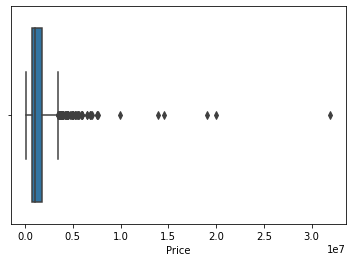

In [59]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Beds'>

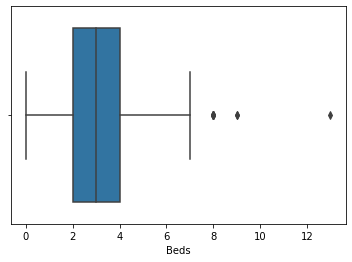

In [60]:
sns.boxplot(x=df['Beds'])

<AxesSubplot:xlabel='Bath'>

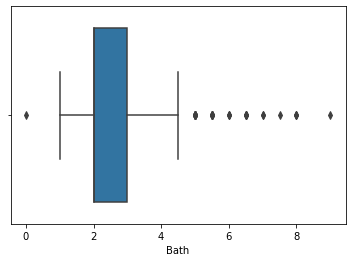

In [61]:
sns.boxplot(x=df['Bath'])

<AxesSubplot:xlabel='Sqft'>

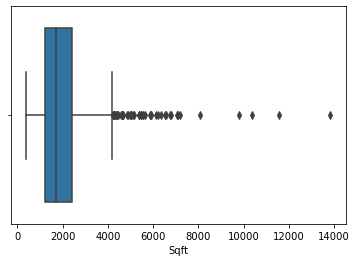

In [62]:
sns.boxplot(x=df['Sqft'])

<AxesSubplot:xlabel='HOA Due'>

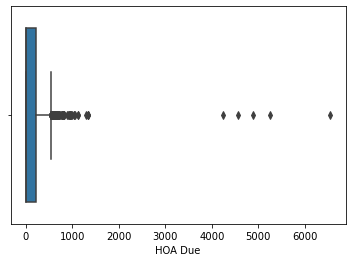

In [63]:
sns.boxplot(x=df['HOA Due'])

<AxesSubplot:xlabel='Lot Area'>

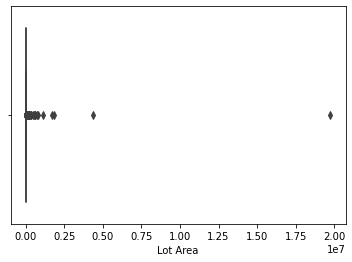

In [64]:
sns.boxplot(x=df['Lot Area'])

<AxesSubplot:xlabel='Redfin_estimate'>

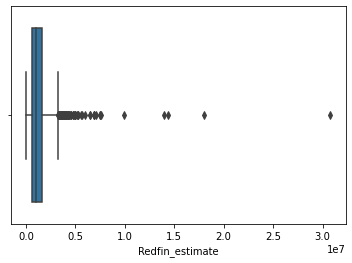

In [65]:
sns.boxplot(x=df['Redfin_estimate'])

In [66]:
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
IQR_Price

1095000.0

In [67]:
Q1_Beds = df['Beds'].quantile(0.25)
Q3_Beds = df['Beds'].quantile(0.75)
IQR_Beds = Q3_Beds - Q1_Beds
IQR_Beds

2.0

In [68]:
Q1_Bath = df['Bath'].quantile(0.25)
Q3_Bath = df['Bath'].quantile(0.75)
IQR_Bath = Q3_Bath - Q1_Bath
IQR_Bath

1.0

In [69]:
Q1_Sqft = df['Sqft'].quantile(0.25)
Q3_Sqft = df['Sqft'].quantile(0.75)
IQR_Sqft = Q3_Sqft - Q1_Sqft
IQR_Sqft

1202.0

In [70]:
Q1_HOA = df['HOA Due'].quantile(0.25)
Q3_HOA = df['HOA Due'].quantile(0.75)
IQR_HOA = Q3_HOA - Q1_HOA
IQR_HOA

214.0

In [71]:
Q1_LotArea = df['Lot Area'].quantile(0.25)
Q3_LotArea = df['Lot Area'].quantile(0.75)
IQR_LotArea = Q3_LotArea - Q1_LotArea
IQR_LotArea

5206.0

In [72]:
Q1_RedfinEstimate = df['Redfin_estimate'].quantile(0.25)
Q3_RedfinEstimate = df['Redfin_estimate'].quantile(0.75)
IQR_RedfinEstimate = Q3_RedfinEstimate - Q1_RedfinEstimate
IQR_RedfinEstimate

1048642.0

In [73]:
df['Price'] = df['Price'][~((df['Price'] < (Q1_Price - 1.5 * IQR_Price)) |(df['Price'] > 
                                                                           (Q3_Price + 1.5 * IQR_Price)))]

In [74]:
df['Beds'] = df['Beds'][~((df['Beds'] < (Q1_Beds - 1.5 * IQR_Beds)) |(df['Beds'] > 
                                                                           (Q3_Beds + 1.5 * IQR_Beds)))]

In [75]:
df['Bath'] = df['Bath'][~((df['Bath'] < (Q1_Bath - 1.5 * IQR_Bath)) |(df['Bath'] > 
                                                                           (Q3_Bath + 1.5 * IQR_Bath)))]

In [76]:
df['Sqft'] = df['Sqft'][~((df['Sqft'] < (Q1_Sqft - 1.5 * IQR_Sqft)) |(df['Sqft'] > 
                                                                           (Q3_Sqft + 1.5 * IQR_Sqft)))]

In [77]:
df['HOA Due'] = df['HOA Due'][~((df['HOA Due'] < (Q1_HOA - 1.5 * IQR_HOA)) |(df['HOA Due'] > 
                                                                           (Q3_HOA + 1.5 * IQR_HOA)))]

In [78]:
df['Lot Area'] = df['Lot Area'][~((df['Lot Area'] < (Q1_LotArea - 1.5 * IQR_LotArea)) |(df['Lot Area'] > 
                                                                           (Q3_LotArea + 1.5 * IQR_LotArea)))]

In [79]:
df['Redfin_estimate'] = df['Redfin_estimate'][~((df['Redfin_estimate'] < (Q1_RedfinEstimate - 1.5 * IQR_RedfinEstimate)) |(df['Redfin_estimate'] > 
                                                                           (Q3_RedfinEstimate + 1.5 * IQR_RedfinEstimate)))]

In [80]:
df.isna().sum() #number of outliers removed

State                    0
County                   0
City                     0
Street                   0
Zipcode                  0
Property_Type            0
Status                   0
Price                   71
Year_Built               0
Beds                    11
Bath                    35
Sqft                    49
Lot Area               161
HOA Due                107
School_rating            0
WalkScore                0
Bike_Score               0
Garage_availability      0
Redfin_estimate         77
dtype: int64

In [81]:
df = df.dropna() #removing the null values. The outliers were removed and replaced by null values
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
5,Ca,Contra-costa-county,Rodeo,30 london ln,94572,Single family residential,New,1249000.0,2022,4.0,3.5,2996.0,4850.0,0.0,0,4,8.0,Yes,0.0
7,Ca,Contra-costa-county,Pittsburg,153 shannon,94565,Mobile/manufactured home,Active,159900.0,2022,2.0,1.0,720.0,8760.0,0.0,5,7,30.0,Yes,160645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Ca,San-mateo-county,East palo alto,332 azalia dr,94303,Single family home,Active,1100000.0,1951,3.0,2.0,1130.0,5000.0,0.0,7,47,76.0,Yes,1098562.0
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0


In [ ]:
#Boxplot after removing outliers

<AxesSubplot:xlabel='Price'>

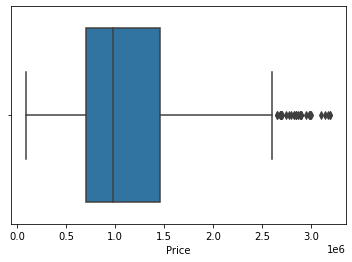

In [82]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Beds'>

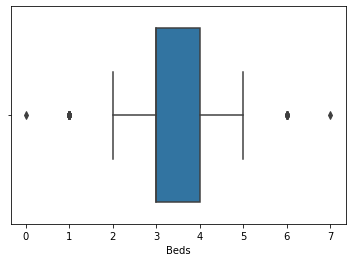

In [83]:
sns.boxplot(x=df['Beds'])

<AxesSubplot:xlabel='Bath'>

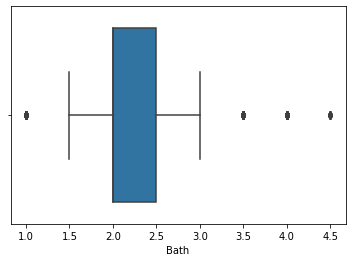

In [84]:
sns.boxplot(x=df['Bath'])

<AxesSubplot:xlabel='Sqft'>

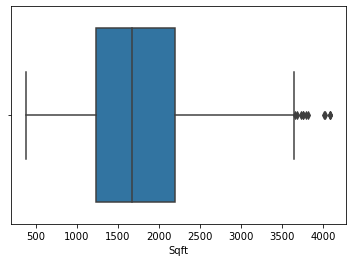

In [85]:
sns.boxplot(x=df['Sqft'])

<AxesSubplot:xlabel='HOA Due'>

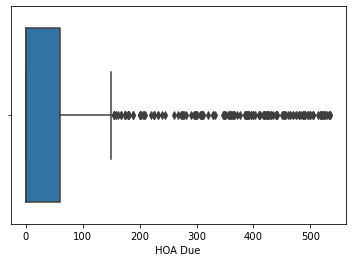

In [86]:
sns.boxplot(x=df['HOA Due'])

<AxesSubplot:xlabel='Lot Area'>

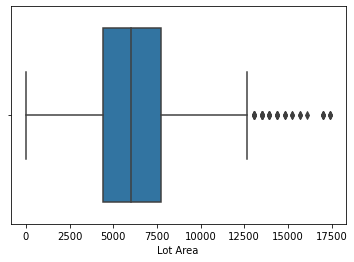

In [87]:
sns.boxplot(x=df['Lot Area'])

<AxesSubplot:xlabel='Redfin_estimate'>

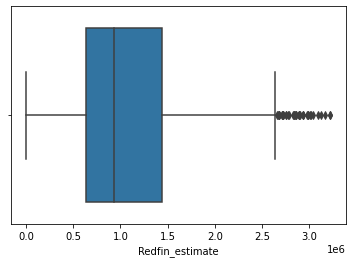

In [88]:
sns.boxplot(x=df['Redfin_estimate'])

In [89]:
#Exporting to csv

In [90]:
df.to_csv('Dataset_AfterDataCleaningFinal.csv',index=False)

In [91]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Contra-costa-county,Oakley,2537 talaria dr,94561,Single family residential,Back on market,649999.0,2014,3.0,2.5,2279.0,6228.0,114.0,6,6,35.0,Yes,655836.0
1,Ca,Contra-costa-county,Pleasant hill,66 kathryn dr,94523,Single family residential,Price change,998000.0,1952,3.0,1.0,1315.0,6650.0,0.0,8,83,76.0,Yes,1048496.0
2,Ca,Contra-costa-county,San ramon,3246 ensenada dr,94583,Single family residential,New,1395000.0,1976,4.0,2.5,1880.0,7000.0,0.0,9,26,67.0,Yes,1413765.0
5,Ca,Contra-costa-county,Rodeo,30 london ln,94572,Single family residential,New,1249000.0,2022,4.0,3.5,2996.0,4850.0,0.0,0,4,8.0,Yes,0.0
7,Ca,Contra-costa-county,Pittsburg,153 shannon,94565,Mobile/manufactured home,Active,159900.0,2022,2.0,1.0,720.0,8760.0,0.0,5,7,30.0,Yes,160645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Ca,San-mateo-county,East palo alto,332 azalia dr,94303,Single family home,Active,1100000.0,1951,3.0,2.0,1130.0,5000.0,0.0,7,47,76.0,Yes,1098562.0
1188,Ca,San-mateo-county,Redwood city,327 g st,94063,Single family home,Active,1649000.0,1951,3.0,2.0,1244.0,5876.0,0.0,9,65,81.0,Yes,1674965.0
1190,Ca,San-mateo-county,Belmont,3322 plateau dr,94002,Single family home,Active,2488000.0,1966,6.0,3.0,2240.0,10290.0,0.0,9,9,19.0,Yes,2463021.0
1191,Ca,San-mateo-county,San mateo,102 waters park cir,94403,Townhouse,New,1463917.0,2021,2.0,2.5,1602.0,10290.0,350.0,7,48,75.0,Yes,1462581.0
